**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

**Data load**

In [ ]:
path= "/content/drive/MyDrive/churnmodel dataset/Churn_Modelling.csv"
df = pd.read_csv(path)

**Data Analysis**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [ ]:
#check null value
df.isnull().values.any()

False

In [ ]:
#check statistics
df.describe().style.background_gradient(cmap='Oranges')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Exploratory Data Analysis (EDA)**

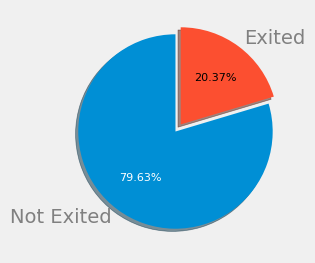

In [ ]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

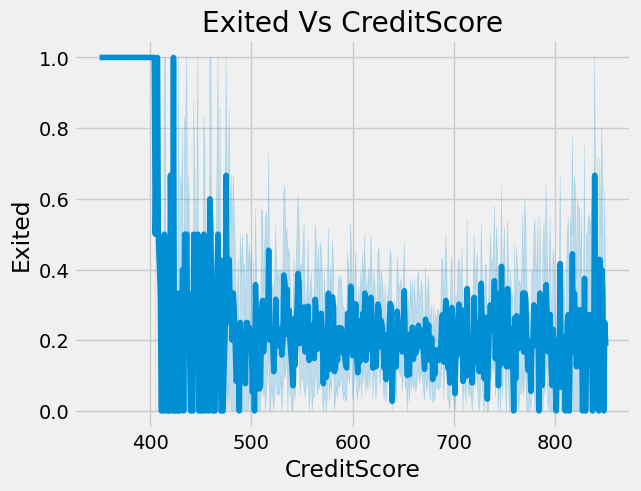

In [ ]:
sns.lineplot(x='CreditScore',y='Exited',data=df)

plt.title('Exited Vs CreditScore')
plt.plot()
plt.show()

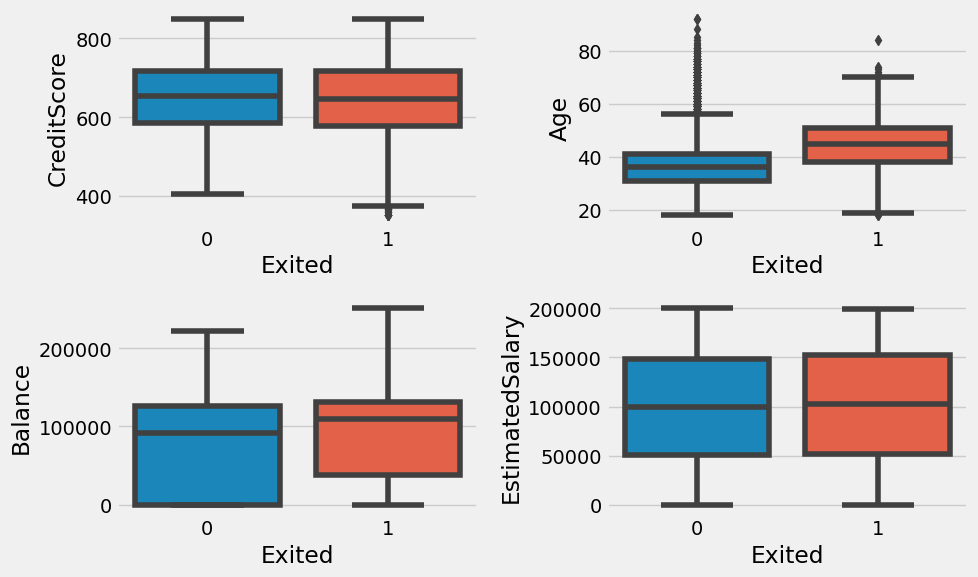

In [ ]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (10, 6))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

**Cooralation**

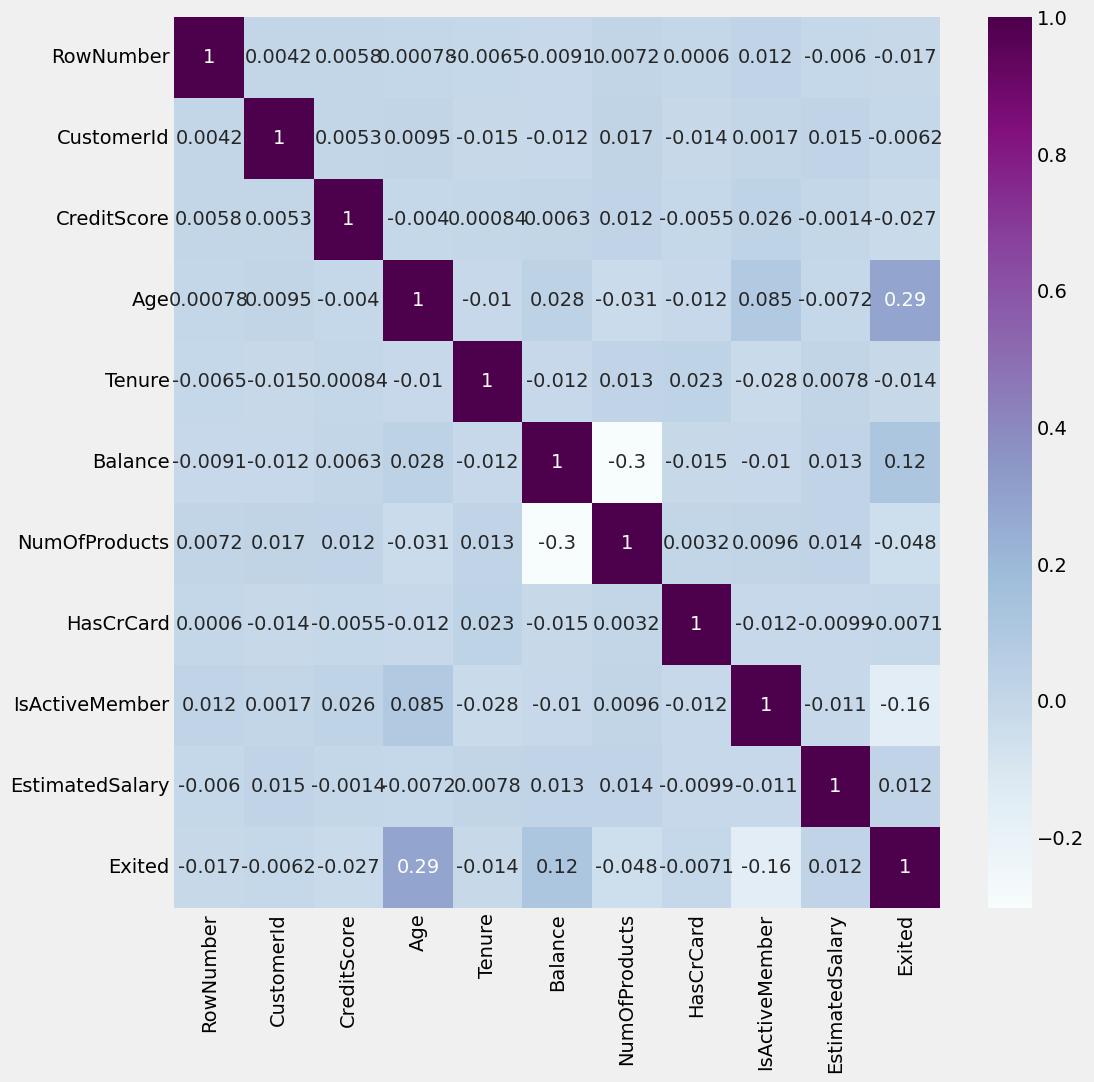

In [ ]:
plt.figure(figsize = (11,11))
sns.heatmap(df.corr(),annot = True, cmap='BuPu')
plt.show()

**Data Cleaning**

In [ ]:
# dropping useless columns

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# Encoding categorical variables

df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.drop('Exited', axis = 1)
y = y= df.Exited

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64
9996,516,0,0,35,10,57369.61,1,1,1,101699.77
9997,709,0,1,36,7,0.00,1,0,1,42085.58
9998,772,1,0,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**1. ANN Model**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


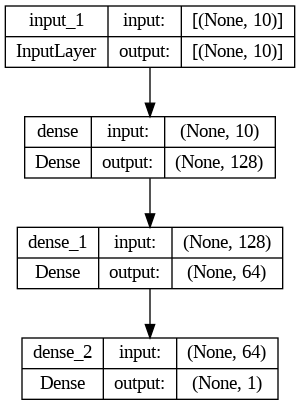

In [ ]:
# Visualize the neural network architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='Exited_model.png', show_shapes=True)

In [ ]:
# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the ANN on the training set
history = model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
250/250 [==============================] - 3s 6ms/step - loss: 0.4279 - accuracy: 0.8198
Epoch 2/50
250/250 [==============================] - 1s 5ms/step - loss: 0.3613 - accuracy: 0.8515
Epoch 3/50
250/250 [==============================] - 2s 7ms/step - loss: 0.3476 - accuracy: 0.8558
Epoch 4/50
250/250 [==============================] - 1s 4ms/step - loss: 0.3414 - accuracy: 0.8571
Epoch 5/50
250/250 [==============================] - 1s 4ms/step - loss: 0.3361 - accuracy: 0.8599
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8610
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3290 - accuracy: 0.8631
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8637
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.8639
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3211 - accuracy: 0.8677

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

**Model Accuracy & Model Loss Plot**

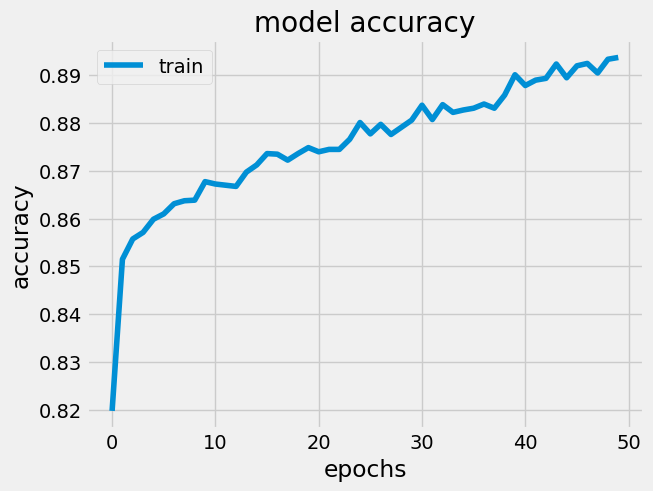

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

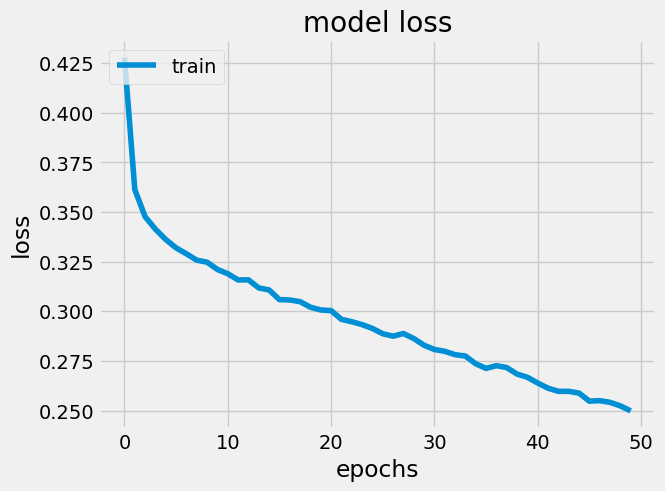

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

**Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test,y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[1527   80]
 [ 213  180]]
Accuracy: 85.35%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.46      0.55       393

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



**ROC_AUC Curve**

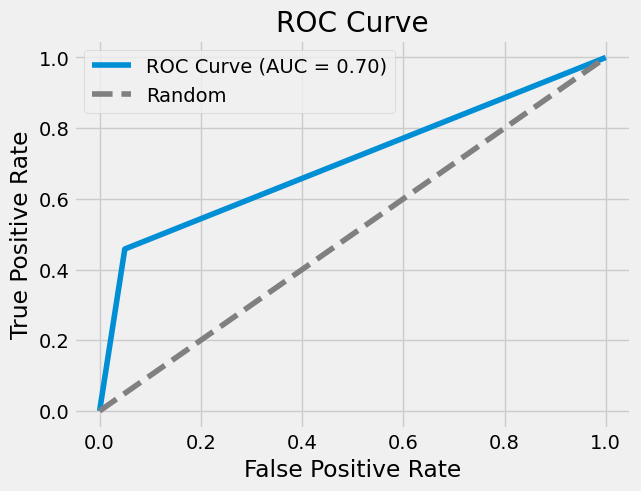

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**2. SVR Model**

In [ ]:
# SVR MODEL
from sklearn.svm import SVR
svr = SVR(kernel='linear')  # You can choose different kernel functions (linear, rbf, etc.)
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
#Training Score
svr.score(X_train, y_train)

-0.06811264566335251

In [ ]:
#Prediction of the test variable
y_pred = svr.predict(X_test)
y_pred

array([0.09998999, 0.10001843, 0.10017002, ..., 0.10002239, 0.09992678,
       0.0999642 ])

In [ ]:
#Weights & Bias

weights = svr.coef_
bias = svr.intercept_

In [ ]:
weights

array([[-5.18440603e-05,  2.30112673e-05,  1.26002036e-05,
         5.75942258e-05, -2.11519686e-05, -2.42453901e-05,
         1.46761495e-05,  1.79125168e-05, -2.33266464e-05,
        -1.88374277e-05]])

In [ ]:
bias

array([0.09996826])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MAE: 0.25716653578451965
MSE: 0.1671901256842716
R2 Score: -0.05891765310653696


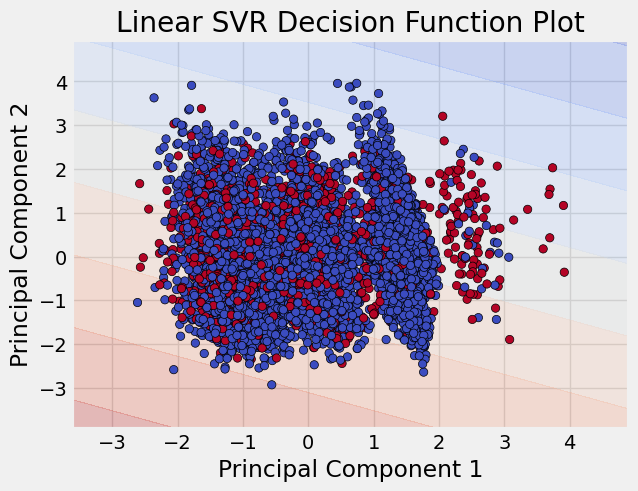

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.decomposition import PCA

# Assuming X_train, y_train are already defined as in your code

# Reduce dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Create a meshgrid for plotting the decision function
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Fit a linear SVR model
linear_svr_model = SVR(kernel='linear', C=1)
linear_svr_model.fit(X_train_2d, y_train)

# Obtain decision function values
Z = linear_svr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision function
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')

# Set plot labels and title
plt.title('Linear SVR Decision Function Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()
